<img src="../assets/a_eyes_readme.gif" style="float:right ; margin: 10px ; width:300px;"> 

<h1><left>Prediction and Analysis of Degree of Suicidal
Ideation in Online Content</left></h1>
<h4><left>by- Rajswi Lochan(Roll no-1806095)</left></h4>
<h4><left> Prince Sinha(Roll no-1806132)</left></h4>
<h4><left> Parth Sharma(Roll no-1806172)</left></h4>

___

## **2. Data Cleaning, Pre-processing and EDA**
Now that we have obtained our data, we will take our first looks into it, seeking out missing values and choosing which parts of the data set will be useful for our classifier. We will also begin pre-processing the text data with natuaral language tools. This section concludes with some exploratory data analysis and visualisations.

In [1]:
#IMPORTING LIBRARIES:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
!pip install wordninja
!pip install wordcloud
!pip install scattertext
from sklearn.feature_extraction.text import CountVectorizer

# IF YOU ARE MISSING "WordCloud":
# TRY INSTALLING VIA TERMINAL LIKE THIS: /anaconda3/bin/python -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
# IF YOU ARE MISSING "wordninja":
# TRY INSTALLING VIA TERMINAL LIKE THIS: pip install wordninja
import wordninja


%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp36-none-any.whl size=541553 sha256=1914c4ad0ababf6dc9e9a1393aada4446b2b26571c002c820cba18461f5a108f
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e93c3bb33ac50e2d368b2586248f192a2e22a
Successfully built wordninja
     |████████████████████████████████| 7.3MB 2.7MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=38d66ee009a35b026058d5d2eec96245ab4e1c64f3ed446c6852de7da40c6c69
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.1 Data Cleaning 

> **Cutting down the dataset** - As both sets have 100 columns, it'll be wise to choose a few columns that will be useful as our predictors. 

> **Concatenation** - As we have already created a "is_suicide" column indicating which subreddit the posts are from, we should concatenate both datasets together. 

> **Imputation** - If there are missing values, we should find a way to impute the data. 

In [13]:
#IMPORTING CSV FILES
depression = pd.read_csv('/content/drive/My Drive/ML mini project (Group-9) /depression_new.csv - Sheet1.csv')
suicide_watch = pd.read_csv('/content/drive/My Drive/ML mini project (Group-9) /suicide_watch_new - Sheet1.csv')


In [14]:
#PEEKING INTO THE DEPRESSION DATA SET
pd.set_option('display.max_columns', 500)
depression.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,is_suicide
0,NaN,depression,We understand that most people who reply immed...,t2_1t70,False,NaN,1,False,Our most-broken and least-understood rules is ...,[],r/depression,False,0,NaN,0,NaN,False,t3_doqwow,False,dark,1.00,NaN,public,2323,23,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,2323,NaN,True,NaN,False,NaN,[],{'gid_2': 1},NaN,True,NaN,1.572390e+09,text,0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,True,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,doqwow,True,NaN,SQLwitch,NaN,175,True,no_ads,False,[],False,NaN,/r/depression/comments/doqwow/our_mostbroken_a...,no_ads,True,https://www.reddit.com/r/depression/comments/d...,692207,1.572361e+09,1,NaN,False,0
1,NaN,depression,Welcome to /r/depression's check-in post - a p...,t2_1t70,False,NaN,0,False,"Regular Check-In Post. Plus, a reminder about ...",[],r/depression,False,0,NaN,0,NaN,False,t3_iq10oq,False,dark,1.00,NaN,public,343,10,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,343,NaN,True,NaN,1599854110.0,NaN,[],{'gid_1': 1},NaN,True,NaN,1.599764e+09,text,0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,iq10oq,True,NaN,SQLwitch,NaN,1237,False,no_ads,False,[],False,NaN,/r/depression/comments/iq10oq/regular_checkin_...,no_ads,True,https://www.reddit.com/r/depression/comments/i...,692207,1.599735e+09,0,NaN,False,0
2,NaN,depression,I can’t imagine how many days I have wasted to...,t2_5u36vs8b,False,NaN,0,False,"I’ve wasted so much time being depressed, that...",[],r/depression,False,0,NaN,0,NaN,False,t3_jhc5fc,False,dark,1.00,NaN,public,2767,7,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,2767,NaN,False,NaN,False,NaN,[],{'gid_1': 2},NaN,True,NaN,1.603587e+09,text,0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qqqf,NaN,NaN,NaN,jhc5fc,True,NaN,RosiePosie710,NaN,104,True,no_ads,False,[],False,NaN,/r/depression/comments/jhc5fc/ive_wasted_so_mu...,no_ads,False,https://www.reddit.com/r/depression/comments/j...,692207,1.603558e+09,0,NaN,False,0
3,NaN,depression,i feel like nobody has genuinely liked me for ...,t2_5qhi38vc,False,NaN,0,False,nobody likes me :(,[],r/depressio

#### Note: Choosing relevant columns

> **Title and Post** -  We felt that the text data in the both the title and the post itself can potentially serve our classifier well. 

> **Author's handle and number of comments** - The author's name and the number of comments are curve ball choices. There just might be some connection between a user's handle and his/her psyche. There also might be a connection between the number of comments made.

> **URL** - We left the URL in for reference. In case we'd want to look deeper into a particular post. 

In [15]:
#WE'VE PICKED OUT FIVE COLUMNS THAT COULD HELP IN OUR EDA.
#LOOKING AT THOSE COLUMNS FOR r/depression 
depression[["title", "selftext", "author",  "num_comments", "is_suicide","url"]].head(3)

,title,selftext,author,num_comments,is_suicide,url
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,175,0,https://www.reddit.com/r/depression/comments/d...
1,"Regular Check-In Post. Plus, a reminder about ...",Welcome to /r/depression's check-in post - a p...,SQLwitch,1237,0,https://www.reddit.com/r/depression/comments/i...
2,"I’ve wasted so much time being depressed, that...",I can’t imagine how many days I have wasted to...,RosiePosie710,104,0,https://www.reddit.com/r/depression/comments/j...


In [16]:
#WE'VE PICKED OUT FIVE COLUMNS THAT COULD HELP IN OUR EDA.
#LOOKING AT THOSE COLUMNS FOR r/Suicide_Watch

suicide_watch[["title", "selftext", "author",  "num_comments", "is_suicide","url"]].head(3)

,title,selftext,author,num_comments,is_suicide,url
0,New wiki on how to avoid accidentally encourag...,We've been seeing a worrying increase in pro-s...,SQLwitch,256,1,https://www.reddit.com/r/SuicideWatch/comments...
1,Please remember that NO ACTIVISM of any kind i...,"Activism, i.e. advocating or fundraising for s...",SQLwitch,38,1,https://www.reddit.com/r/SuicideWatch/comments...
2,I'd be 80-90% less suicidal if I didn't have m...,NaN,lifeistheworstthing,89,1,https://www.reddit.com/r/SuicideWatch/comments...


In [17]:
#COMPARING SHAPES OF BOTH TABLES
depression[["title", "selftext", "author",  "num_comments", "is_suicide","url"]].shape

(994, 6)

In [18]:
suicide_watch[["title", "selftext", "author",  "num_comments", "is_suicide","url"]].shape

(988, 6)

In [19]:
#READING A RANDOM POST FROM r/depression
print(depression["selftext"][118])
len(depression["selftext"][118])

I’ve never been diagnosed and I’ve always been the fun bubbly party-starter, but I’ve caught myself this year just randomly crying for no reason or feeling a huge gap inside me like I’m an empty shell. Is this typical of someone diagnosed with depression? 

I searched “feeling empty” and this sub popped right up.

I hope I’m not being insensitive and appreciate any views or advice on overcoming this shared. Thank you.


421

In [20]:
#READING A RANDOM POST FROM r/SuicideWatch
#I SUSPECT THE POSTS FROM r/SuicideWatch MIGHT BE SHORTER.
#MIGHT BE WORTH CHECKING OUT IN AN EDA LATER
print(suicide_watch["selftext"][118])
len(suicide_watch["selftext"][118])

There’s this human in this ugly reality. His ugly reality. 
And he wants to go. Just go. Go go go! 
He is prepared and ready to go. Where? Somewhere not here. 
More specifically he is ready to die.. He wants to leave in that sense
He doesn’t want to be anymore.
And even if he leaves, he arrives somewhere else where he doesn’t want to be
Wherever he goes, it’s still an ugly reality. One he can’t seem to escape.
The only escape is in the mind.
Choosing a different destination - will give him a sense of direction.
Getting ready to leave and being on the go... Gives him peace.
Getting lost in his work - gives him some relief
And getting lost in distractions.. Gives him some time to think. 
Like in that “waiting for the download” meme.
It’s existential dread. One existential crisis then another.
Reasons to give up, outweighing the reason to try again.
Reasons to exist, being overwhelmed by the reasons to end it.
He is ready to go. That’s all he knows.
He feels like going.
He does not want t

1081

In [21]:
#WE'LL CONCAT THE SELECTED PARTS OF BOTH DATASETS BEFORE CLEANING IT
dep_columns = depression[["title", "selftext", "author",  "num_comments", "is_suicide","url"]]
sui_columns = suicide_watch[["title", "selftext", "author",  "num_comments", "is_suicide","url"]]
combined_data = pd.concat([dep_columns,sui_columns],axis=0, ignore_index=True)    
combined_data

,title,selftext,author,num_comments,is_suicide,url
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,175,0,https://www.reddit.com/r/depression/comments/d...
1,"Regular Check-In Post. Plus, a reminder about ...",Welcome to /r/depression's check-in post - a p...,SQLwitch,1237,0,https://www.reddit.com/r/depression/comments/i...
2,"I’ve wasted so much time being depressed, that...",I can’t imagine how many days I have wasted to...,RosiePosie710,104,0,https://www.reddit.com/r/depression/comments/j...
3,nobody likes me :(,i feel like nobody has genuinely liked me for ...,aannxbel,7,0,https://www.reddit.com/r/depression/comments/j...
4,I took out my garbage today,"Not really exciting info, but didn’t empty out...",BackdoorAlex2,3,0,https://www.reddit.com/r/depression/comments/j...
...,...,...,...,...,...,...
1977,:((,I don’t wanna work to live my shitty life. I’d...,human_salamander12,0,1,https://www.reddit.com/r/SuicideWatch/comments...
1978,My plan,I already have a plan for how to end everythin...,Lunharis,2,1,https://www.reddit.com/r/SuicideWatch/comments...
1979,I wrote two notes,And that’s where I’m at. I don’t think I’ll do...,onlyhere4lolz,1,1,https://www.reddit.com/r/SuicideWatch/comments...
1980,I wish I could be temporarily dead to see if i...,I just want to know how people would react if ...,PinkPunkStrikesAgain,13,1,https://www.reddit.com/r/SuicideWatch/comments...


In [ ]:
#BACKING UP combined_data IN A CSV FILE
combined_data.to_csv('/content/drive/My Drive/ML mini project/combined_dataset_new - Sheet1.csv', index = False)

In [22]:
#CHECKING FOR MISSING DATA
#THERE ARE ONLY NULL VALUES IN OUR selftext COLUMN
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1982 non-null   object
 1   selftext      1915 non-null   object
 2   author        1982 non-null   object
 3   num_comments  1982 non-null   int64 
 4   is_suicide    1982 non-null   int64 
 5   url           1982 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.0+ KB


In [23]:
#CHECKING OUT THE ROWS WITH MISSING selftext DATA
combined_data[combined_data["selftext"].isnull()].head(10)

,title,selftext,author,num_comments,is_suicide,url
31,"I don't want to die, nor do I wish to stop exi...",NaN,DiscardableLikeMe,0,0,https://www.reddit.com/r/depression/comments/j...
137,What if I get help and I’m not me anymore?,NaN,TemporaryFluid,1,0,https://www.reddit.com/r/depression/comments/j...
141,Google says DEPRESSION is an imbalance? But do...,NaN,rish_liveSFW,1,0,https://www.reddit.com/r/depression/comments/j...
216,I just keep moving from one bad decision to th...,NaN,JMK101864,1,0,https://www.reddit.com/r/depression/comments/j...
243,I'm too alone. I work and study too much. I'm ...,NaN,Both_Artist,0,0,https://www.reddit.com/r/depression/comments/j...
264,Do anyone else find it to hard and completely ...,NaN,Journey333444,1,0,https://www.reddit.com/r/depression/comments/j...
298,I’m miserable,NaN,alexamurillo,0,0,https://www.reddit.com/r/depression/comments/j...
304,About to go to a diner party in the middle of ...,NaN,ilovekuro,0,0,https://www.reddit.com/r/depression/comments/j...
387,"Because I'm too stupid to manage money, my acc...",NaN,Fried_chicken_addict,0,0,https://www.reddit.com/r/depression/comments/j...
388,",,It's okay, I hate me too.""",NaN,wheesa_enthusiast,0,0,https://www.reddit.com/r/depression/comments/j...


In [24]:
#THE NaNs APPEAR OVERWHELMINGLY IN r/SuicideWatch POSTS (98.46%)
#IT MIGHT BE IMPORTANT TO DIG INTO THE TITLES OF THESE POSTS LATER
#WE WILL NOT DROP THESE ROWS
#DATA IMPUTATION DECISION MADE: REPLACE NaNs WITH "emptypost"
combined_data["is_suicide"][combined_data["selftext"].isnull()].value_counts()

1    42
0    25
Name: is_suicide, dtype: int64

In [25]:
#FILLING NaNs
combined_data["selftext"].fillna("emptypost",inplace=True)

In [ ]:
#CHECKING IF NaNs WERE FILLED IN
combined_data[combined_data["selftext"].isin(["emptypost"])].head()

In [ ]:
#DOUBLE-CHECKING
#MISSING VALUES IMPUTED
#ON TO PRE-PROCESSING...
combined_data.info()

### 2.2 Pre-processing
As the posts are written by different humans, they come in different forms. In order to prepare the data for our classifier, we will have to take steps to pre-process the posts. 

> **Build processing functions** - We will build a processing function that will help change the text to lowercase, remove punctuations, reduce related words down to a common base word. With this functions, we can create a seperate column for our clean data. 


In [26]:
def processing_text(series_to_process):
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()
    for i in range(len(series_to_process)):
        #TOKENISED ITEM(LONG STRING) IN A LIST
        dirty_string = (series_to_process)[i].lower()
        words_only = tokenizer.tokenize(dirty_string) #WORDS_ONLY IS A LIST THAT DOESN'T HAVE PUNCTUATION
        #LEMMATISE THE ITEMS IN WORDS_ONLY
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        #REMOVING STOP WORDS FROM THE LEMMATIZED LIST
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        #RETURN SEPERATED WORDS INTO LONG STRING
        long_string_clean = " ".join(word for word in words_without_stop)
        new_list.append(long_string_clean)
    return new_list

In [27]:
#CHECKING TO SEE NEW COLUMNS WERE ADDED
import nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
combined_data["selftext_clean"] = processing_text(combined_data["selftext"])
combined_data["title_clean"] = processing_text(combined_data["title"])
pd.set_option("display.max_colwidth", 100)
combined_data.head(8)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,selftext,author,num_comments,is_suicide,url,selftext_clean,title_clean
0,"Our most-broken and least-understood rules is ""helpers may not invite private contact as a first...",We understand that most people who reply immediately to an OP with an invitation to talk private...,SQLwitch,175,0,https://www.reddit.com/r/depression/comments/doqwow/our_mostbroken_and_leastunderstood_rules_is/,understand people reply immediately op invitation talk privately mean help type response usually...,broken least understood rule helper may invite private contact first resort made new wiki explain
1,"Regular Check-In Post. Plus, a reminder about the No-Activism Rule.",Welcome to /r/depression's check-in post - a place to take a moment and share what is going on a...,SQLwitch,1237,0,https://www.reddit.com/r/depression/comments/iq10oq/regular_checkin_post_plus_a_reminder_about_the/,welcome r depression check post place take moment share going accomplishment want talk standalon...,regular check post plus reminder activism rule
2,"I’ve wasted so much time being depressed, that I’m depressed about wasting time.",I can’t imagine how many days I have wasted to being sad and crying and not being able to accomp...,RosiePosie710,104,0,https://www.reddit.com/r/depression/comments/jhc5fc/ive_wasted_so_much_time_being_depressed_that...,imagine many day wasted sad cry able accomplish thing need responsibility deadline none seem mat...,wasted much time depressed depressed wasting time
3,nobody likes me :(,i feel like nobody has genuinely liked me for who i am. i’m always that annoying friend that jus...,aannxbel,7,0,https://www.reddit.com/r/depression/comments/jhp3s4/nobody_likes_me/,feel like nobody ha genuinely liked always annoying friend tag along burden everyone even thinki...,nobody like
4,I took out my garbage today,"Not really exciting info, but didn’t empty out my garbage cans and recycling in a bit over a mon...",BackdoorAlex2,3,0,https://www.reddit.com/r/depression/comments/jhs4je/i_took_out_my_garbage_today/,really exciting info empty garbage recycling bit month bin wa full overflowing onto carpet today...,took garbage today
5,Are most people sad?,"I’ve been scrolling through this subreddit all night now, and I’m beginning to realize there is ...",Ninthrooster,20,0,https://www.reddit.com/r/depression/comments/jhnzod/are_most_people_sad/,scrolling subreddit night beginning realize infinite amount people going worst shit ever started...,people sad
6,I wonder how it is to have a good life,"I feel like I was born with bad luck, and others have luck, better lives and are happier. I didn...",Ionut201,13,0,https://www.reddit.com/r/depression/comments/jhra2u/i_wonder_how_it_is_to_have_a_good_life/,feel like wa born bad luck others luck better life happier feel happy long time motivation anyth...,wonder good life
7,My best friends bachelor/bachelorette party made me suicidal,I hate typing this out because typing it hurts but it is what it is.\n\nThey’re my best friends ...,cryptidmarty,3,0,https://www.reddit.com/r/depression/comments/jhnsiy/my_best_friends_bachelorbachelorette_party_m...,hate typing typing hurt best friend joint party thats roll wa held friend house apartment small ...,best friend bachelor bachelorette party made suicidal


In [28]:
#CHECKING ON selftext_clean
pd.set_option("display.max_colwidth", 1000)
combined_data[["selftext","selftext_clean"]].head(2)

,selftext,selftext_clean
0,"We understand that most people who reply immediately to an OP with an invitation to talk privately mean only to help, but this type of response usually leads to either disappointment or disaster. it usually works out quite differently here than when you say ""PM me anytime"" in a casual social context. \n\nWe have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves. We're hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start. \n\nOur new wiki page explains in detail why it's much better to respond in public comments, at least until you've gotten to know someone. It will be maintained at /r/depression/wiki/private_contact, and the full text of the current version is below.\n\n*****\n\n###Summary###\n\n**Anyone who, while a...",understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give get quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private_contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems like kind generous offer might perfectly well meaning unless solid rapport ha established wise idea point consider offer accept invitation communicate privately posting supportive reply publicly help people op respons...
1,"Welcome to /r/depression's check-in post - a place to take a moment and share what is going on and how you are doing. If you have an accomplishment you want to talk about (these shouldn't be standalone posts in the sub as they violate the ""role model"" rule, but are welcome here), or are having a tough time but prefer not to make your own post, this is a place you can share.\n\nWe try our best to keep this space as safe and supportive as possible on reddit's wide-open anonymity-friendly platform. The community rules can be found in the sidebar, or under ""Community Info"" in the official mobile apps. If you aren't sure about a rule, please ask us. \n\n********\n\nPlease keep in mind that no activism, i.e. advocating or fundraising for social change or raising awareness of social issues, is ever allowed here. It's not that we're against activism. We're strongly in favour of it. But we've learned the hard way that it doesn't work within a dedicated support space, so with regret, we...",welcome r depression check post place take moment share going accomplishment want talk standalone post sub violate role model rule welcome tough time prefer make post place share try best keep space safe supportive possible reddit wide open anonymity friendly platform community rule found sidebar community info official mobile apps sure rule please ask u please keep mind activism e advocating fundraising social change raising awareness social issue ever allowed activism strongly favour learned hard way work within dedicated support space regret allow thanks understanding please report fundraising awareness raising petition call participation post mainly cause issue rather request personal support


In [29]:
#CHECKING ON title_clean
pd.set_option("display.max_colwidth", 100)
combined_data[["title","title_clean"]].head(5)

,title,title_clean
0,"Our most-broken and least-understood rules is ""helpers may not invite private contact as a first...",broken least understood rule helper may invite private contact first resort made new wiki explain
1,"Regular Check-In Post. Plus, a reminder about the No-Activism Rule.",regular check post plus reminder activism rule
2,"I’ve wasted so much time being depressed, that I’m depressed about wasting time.",wasted much time depressed depressed wasting time
3,nobody likes me :(,nobody like
4,I took out my garbage today,took garbage today


In [30]:
#TESTING WORDNINJA'S SKILLS
#SEEMS TO BE A DECENT NINJA
author_test = []
for i in range(10):
    splits_list = wordninja.split(combined_data["author"][i])
    combined_string = " ".join(splits_list)
    author_test.append(combined_string)
test_dict = {combined_data["author"][i]:author_test[i] for i in range(10)}
print(test_dict)

{'SQLwitch': 'SQL witch', 'RosiePosie710': 'Rosie Pos ie 710', 'aannxbel': 'a an nx bel', 'BackdoorAlex2': 'Backdoor Alex 2', 'Ninthrooster': 'Ninth rooster', 'Ionut201': 'Ion ut 201', 'cryptidmarty': 'crypt id marty', 'Hrkl': 'Hrk l', 'Quick_Light7828': 'Quick Light 7828'}


In [31]:
def processing_author_names(series_to_process):
    author_split = []
    for i in range(len(series_to_process)):
        splits_list = wordninja.split(series_to_process[i])
        combined_string = " ".join(splits_list)
        author_split.append(combined_string)
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()
    for i in range(len(author_split)):
        #TOKENISED ITEM(LONG STRING) IN A LIST
        dirty_string = (author_split)[i].lower()
        words_only = tokenizer.tokenize(dirty_string) #WORDS_ONLY IS A LIST THAT DOESN'T HAVE PUNCTUATION
        #LEMMATISE THE ITEMS IN WORDS_ONLY
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        #REMOVING STOP WORDS FROM THE LEMMATIZED LIST
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        #RETURN SEPERATED WORDS INTO LONG STRING
        long_string_clean = " ".join(word for word in words_without_stop)
        new_list.append(long_string_clean)
    return new_list

In [32]:
combined_data["author_clean"]= processing_author_names(combined_data["author"])

#CHECKING ON author_clean
pd.set_option("display.max_colwidth", 100)
combined_data[["author","author_clean"]].tail(10)

,author,author_clean
1972,Reduric,red uric
1973,robloxplayer2021,roblox player 2021
1974,DeeKomTrikru,dee kom tri kru
1975,SeeSawMob15,seesaw mob 15
1976,Calinychta,cali nyc ht
1977,human_salamander12,human salamander 12
1978,Lunharis,lun har
1979,onlyhere4lolz,4 lol z
1980,PinkPunkStrikesAgain,pink punk strike
1981,Bunnyboneigh09,bunny bo neigh 09


In [33]:
#CHECKING IF OUR FUNCTIONS INTRODUCED MISSING DATA INTO OUR NEW COLS
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1982 non-null   object
 1   selftext        1982 non-null   object
 2   author          1982 non-null   object
 3   num_comments    1982 non-null   int64 
 4   is_suicide      1982 non-null   int64 
 5   url             1982 non-null   object
 6   selftext_clean  1982 non-null   object
 7   title_clean     1982 non-null   object
 8   author_clean    1982 non-null   object
dtypes: int64(2), object(7)
memory usage: 139.5+ KB


In [34]:
#DOUBLE-CHECKING IF OUR FUNCTIONS INTRODUCED MISSING DATA INTO OUR NEW COLS
combined_data.isnull().sum()

title             0
selftext          0
author            0
num_comments      0
is_suicide        0
url               0
selftext_clean    0
title_clean       0
author_clean      0
dtype: int64

#### We have cleaned and pre-processed our text data. 
> We now have three possible columns to build our classifier on: "author_clean", "selftext_clean", "title_clean". Now, on to EDA.

### 2.3 Exploratory Data Analysis
Some areas to check out:

> **Top words** - This would be our obvious first step in our EDA. To peek and see what are the most used words in the title, posts and usernames.

> **Significant Authors** - This might not really affect the classifier that we are using, but it might be worth it to check out users who post often and users who has posted on both subreddits. 

> **Average length of posts** - We have already noticed a significant number of posts with no words in r/SuicideWatch posts. We should dive in to check out what the number of words are in an average post in each subreddit.  


In [35]:
#USING MASKS TO CREATE SLICES OF OUR DATAFRAME FOR VISUALISATION
suicide_posts = combined_data[combined_data["is_suicide"] ==1]["selftext_clean"]
suicide_titles = combined_data[combined_data["is_suicide"] ==1]["title_clean"]
suicide_authors = combined_data[combined_data["is_suicide"] ==1]["author_clean"]

depression_posts = combined_data[combined_data["is_suicide"] ==0]["selftext_clean"]
depression_titles = combined_data[combined_data["is_suicide"] ==0]["title_clean"]
depression_authors = combined_data[combined_data["is_suicide"] ==0]["author_clean"]

### 2.3.1 Top Words (subreddit Posts)
We will visualise the most-used words in the respective subreddit posts in a word cloud and a barplot. We will first define a function that will help us with that. The function can be re-used for our titles and usernames later. 

In [38]:
#DEFINING A FUNCTION TO VISUALISE MOST USED WORDS
def plot_most_used_words(category_string, data_series, palette, image_mask):
    #CHECKING OUT COMMON WORDS IN r/SuicideWatch USING CVEC
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(data_series)
    #CREATING A DATAFRAME OF EXTRACTED WORDS
    created_df = pd.DataFrame(cvec.transform(data_series).todense(),
                              columns=cvec.get_feature_names())
    total_words = created_df.sum(axis=0)
    
    #<<<WORDCLOUD>>>
    #CREATING A LONG STRING OF WORDS FOR THE WORD CLOUD MODULE
    top_40_words = total_words.sort_values(ascending = False).head(40)
    top_40_words_df = pd.DataFrame(top_40_words)
    top_words_cloud_df = top_40_words_df.reset_index()
    top_words_cloud_df.columns = ["words", "count"]
    one_string_list = []
    for i in range(len(top_words_cloud_df)):
        one_string = (top_words_cloud_df["words"][i] + " ")* top_words_cloud_df["count"][i]
        one_string_list.append(one_string)
    long_string = " ".join(string for string in one_string_list)
    #print(long_string)
    # CREATING A WORD CLOUD IMAGE
    mask = np.array(Image.open(image_mask))
    wordcloud = WordCloud(repeat=True, collocations=False,min_font_size=2, max_font_size= 80, max_words= 1000, background_color= "white",colormap= palette,  mask= mask).generate(long_string)
    # DISPLAY IT
    #image_colors = ImageColorGenerator(mask)
    #plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    #plt.axis("off")
    plt.figure(figsize = (20, 5), dpi=300)
    plt.title('\nTop Words used in {}\n'.format(category_string), fontsize=22)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    #<<<BARPLOT>>>
    #CREATING A FINAL DATAFRAME OF THE TOP 20 WORDS
    top_20_words = total_words.sort_values(ascending = False).head(20)
    top_20_words_df = pd.DataFrame(top_20_words, columns = ["count"])
    #PLOTTING THE COUNT OF THE TOP 20 WORDS
    sns.set_style("white")
    plt.figure(figsize = (15, 8), dpi=300)
    ax = sns.barplot(y= top_20_words_df.index, x="count", data=top_20_words_df, palette = palette)
    
    plt.xlabel("Count", fontsize=9)
    plt.ylabel('Common Words in {}'.format(category_string), fontsize=9)
    plt.yticks(rotation=-5)

In [40]:
#CALLING THE FUNCTION ON r/depression POSTS
#WE'LL USE DIFFERENT PALETTES TO SEPERATE THE TWO REDDITS: 
#THE PENSIVE "ocean_r" FOR r/depression AND THE HEAVY AND DARK SHADES OF "magma" FOR FOR r/SuicideWatch 
plot_most_used_words("r/depression Posts", depression_posts, palette="ocean_r", image_mask="/content/drive/My Drive/ML mini project (Group-9) /assets/depression_mask.png")

Output hidden; open in https://colab.research.google.com to view.

In [41]:
#CALLING THE FUNCTION ON r/SuicideWatch POSTS
plot_most_used_words("r/SuicideWatch Posts", suicide_posts, palette="magma", image_mask="/content/drive/My Drive/ML mini project (Group-9) /assets/suicide_mask.png")

Output hidden; open in https://colab.research.google.com to view.

#### Reviewing "Top Words" in posts
> **Many similar words** - We see a massive amount of similar words in our "top 20 words" from both subreddits like: wa, want, like, feel, life and people. This might make it difficult four our model. 

> **Unique words from r/depression** - "depression"

> **Unique words from r/SuicideWatch** - "anymore"

### 2.3.2 Top Words (subreddit Titles)
We will visualise the most-used words the our respective subreddit titles in a word cloud and a barplot. 

In [42]:
#CALLING THE FUNCTION ON r/depression TITLES
plot_most_used_words("r/depression Titles", depression_titles, palette="ocean_r", image_mask="/content/drive/My Drive/ML mini project (Group-9) /assets/depression_mask.png")

Output hidden; open in https://colab.research.google.com to view.

In [43]:
#CALLING THE FUNCTION ON r/SuicideWatch TITLES
plot_most_used_words("r/SuicideWatch Titles", suicide_titles, palette="magma_r", image_mask="/content/drive/My Drive/ML mini project (Group-9) /assets/suicide_mask.png")

Output hidden; open in https://colab.research.google.com to view.

#### Reviewing "Top Words" in titles
> **Titles a better differentiator?** - We still see a fair amount of similar words in our "top 20 words" in our titles, but much less than in Posts. As Titles in the two subreddits seem to differ more than Posts, it might serve as a better place for our models to hunt for features.

> **Unique words from r/depression titles** - "depression", "depressed", "hate"

> **Unique words from r/SuicideWatch titles** - "die", "kill", "suicidal", "live", "year"

> **The difference between Wanting and Feeling** - It is interesting to note that the top word in r/SuicideWatch is the word "want" and it is used more than twice compared to the word "feel". In r/depression, the top word is "feel" and similarly, is used close to twice the amount of times compared to "want". This trend is also reflected in our visualisations for posts. 

### 2.3.3 Top Words (subreddit Usernames)
We will visualise our most-used words in the respective subreddit usernames in a word cloud and a barplot. The choice of exploring usernames is an odd one as usernames are really short and it'll be really surprising if we can find something revealing in a sample pool of 1897 usernames. Let's try any way!

In [44]:
#CALLING THE FUNCTION ON r/depression USERNAMES
plot_most_used_words("r/depression Usernames", depression_authors, palette="ocean_r", image_mask="/content/drive/My Drive/ML mini project (Group-9) /assets/depression_mask.png")

Output hidden; open in https://colab.research.google.com to view.

In [45]:
#CALLING THE FUNCTION ON r/SuicideWatch USERNAMES
plot_most_used_words("r/SuicideWatch Usernames", suicide_authors, palette="magma", image_mask="/content/drive/My Drive/ML mini project (Group-9) /assets/suicide_mask.png")

Output hidden; open in https://colab.research.google.com to view.

In [46]:
#CHECKING ON THE OCCURENCES OF "throwaway" IN USERNAMES
combined_data["author_clean"].str.contains("throwaway").sum()

53

In [47]:
#CHECKING ON THE OCCURENCES OF MALE-SIGNIFIERS IN r/depression USERNAMES
search_values = ["mr", "man", "boy", "guy", "dude"]
depression_authors.str.contains('|'.join(search_values)).sum()

20

In [48]:
#CHECKING ON THE OCCURENCES OF MALE-SIGNIFIERS IN r/SuicideWatch USERNAMES
search_values = ["mr", "man", "boy", "guy", "dude"]
suicide_authors.str.contains('|'.join(search_values)).sum()

33

In [49]:
#CHECKING ON THE OCCURENCES OF MALE-SIGNIFIERS IN ALL USERNAMES
search_values = ["mr", "man", "boy", "guy", "dude"]
combined_data["author_clean"].str.contains('|'.join(search_values)).sum()

53

In [50]:
#CHECKING ON THE OCCURENCES OF FEMALE-SIGNIFIERS IN ALL USERNAMES
search_values = ["ms", "woman", "girl", "gal", "lady"]
combined_data["author_clean"].str.contains('|'.join(search_values)).sum()

18

In [51]:
#CHECKING ON THE OCCURENCES OF "girl" IN IN r/SuicideWatch USERNAMES
suicide_authors[suicide_authors.str.contains("girl")]

1064              e sad girl
1183    dead inside girl 101
1186               girl lena
1321          bam arose girl
1458       bad lil baby girl
1547            hawkins girl
1694     cute anime girl 420
1762         tattoo girl 017
Name: author_clean, dtype: object

In [52]:
#CHECKING OUT WHETHER THE OCCURENCES OF NUMBERS IS UNIQUE TO r/depression
depression_authors[depression_authors.str.contains(r"\d")].count()

373

In [53]:
#CHECKING OUT WHETHER THE OCCURENCES OF NUMBERS IS UNIQUE TO r/depression
#THE ANSWER IS NO. IN FACT, r/SuicideWatch HAS MORE USERNAMES WITH NUMBERS IN THEM
suicide_authors[suicide_authors.str.contains(r"\d")].count()

419

In [54]:
#420, OR FOUR-TWENTY IS SLANG FOR CANNABIS CONSUMPTION.
#CHECKING OUT USER NAMES WITH 420 IN THEM 
combined_data["author_clean"][combined_data["author_clean"].str.contains(r"420")]

12             tax dick 420
99              cunt 420 ss
903       spirited bee 3420
1694    cute anime girl 420
1934           420 meme 666
Name: author_clean, dtype: object

In [55]:
len(combined_data["author_clean"])

1982

#### Reviewing "Top Words" in Usernames

> **Throwaways Dominate** - There are 67 accounts(out of 1897) with the word "throwaway" in it. Throwaway accounts are temporary accounts used by users who want to maintain some anonymity. This is understandable given the subject matter of mental health. 

> **Male-signifiers** - Our top 20 list for depression is dominated by usernames with "mr", "man", "boy", "guy" in them. A check in on our full list of authornames revealed that there are more male-related names(68) than female ones(15). Its not a strong link our finding, but it is worth noting that there is a gender paradox in suicide studies, which observes the phenomenon of women having more suicidal thoughts while men commit suicide more frequently. 

> **Marijuana** - The 420, or "four-twenty", cannabis code made its way into our top 20 for depression. It might be worthwhile to look for links to drug-use in our posts. 

> **Usefulness of Usernames?** - Although our discoveries in Usernames are interesting, the "Top Words" occur in an average of 5 usernames. This might give our model some trouble. "Title" is still my top choice as the column to use to search for features. 

### 2.3.4 Significant Authors 
As an attempt to understand the community in the pages, we will attempt check out users who post often and users who has posted on both subreddits.

In [56]:
#LOOKING AT AUTHORS WITH THE MOST POSTS
combined_data["author"].value_counts().head(20)

[deleted]               17
muhfukinwhale           15
Depressed_bitch666      10
NF4Life44                9
Longjumping_Candy379     9
dudhugsalot              6
lifeistheworstthing      6
sixdegrees102            5
papertry                 5
emokid2021               5
Worldly-Cantaloupe-6     5
Outrageous_Reward136     5
survive_tragedy          5
bluedepressedboi         5
huntychuu                4
SQLwitch                 4
Interesting_Dot_5319     4
might_kms                4
human_salamander12       4
violet13wolf             4
Name: author, dtype: int64

In [57]:
#READING THE POSTS BY AUTHORS WITH THE MOST POSTS
pd.set_option("display.max_colwidth", 1000)
combined_data[["is_suicide","author","title", "selftext"]][combined_data["author"].isin(['Vivid-Smile', 'throaway8297338', 'snakesnack148', 'outakuslayer69',
       'enk9898', 'SQLwitch'])].sort_values("author")

,is_suicide,author,title,selftext
0,0,SQLwitch,"Our most-broken and least-understood rules is ""helpers may not invite private contact as a first resort"", so we've made a new wiki to explain it","We understand that most people who reply immediately to an OP with an invitation to talk privately mean only to help, but this type of response usually leads to either disappointment or disaster. it usually works out quite differently here than when you say ""PM me anytime"" in a casual social context. \n\nWe have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves. We're hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start. \n\nOur new wiki page explains in detail why it's much better to respond in public comments, at least until you've gotten to know someone. It will be maintained at /r/depression/wiki/private_contact, and the full text of the current version is below.\n\n*****\n\n###Summary###\n\n**Anyone who, while a..."
1,0,SQLwitch,"Regular Check-In Post. Plus, a reminder about the No-Activism Rule.","Welcome to /r/depression's check-in post - a place to take a moment and share what is going on and how you are doing. If you have an accomplishment you want to talk about (these shouldn't be standalone posts in the sub as they violate the ""role model"" rule, but are welcome here), or are having a tough time but prefer not to make your own post, this is a place you can share.\n\nWe try our best to keep this space as safe and supportive as possible on reddit's wide-open anonymity-friendly platform. The community rules can be found in the sidebar, or under ""Community Info"" in the official mobile apps. If you aren't sure about a rule, please ask us. \n\n********\n\nPlease keep in mind that no activism, i.e. advocating or fundraising for social change or raising awareness of social issues, is ever allowed here. It's not that we're against activism. We're strongly in favour of it. But we've learned the hard way that it doesn't work within a dedicated support space, so with regret, we..."
994,1,SQLwitch,"New wiki on how to avoid accidentally encouraging suicide, and how to spot covert incitement","We've been seeing a worrying increase in pro-suicide content showing up here and, and also going unreported. This undermines our purpose here, so we wanted to highlight and clarify our guidelines about both direct and indirect incitement of suicide. \n\nWe've created a wiki that covers these issues. We hope this will be helpful to anyone who's wondering whether something's okay here and which responses to report. It explains in detail why *any* validation of suicidal intent, even an ""innocent"" message like ""if you're 100% committed, I'll just wish you peace"" is likely to increase people's pain, and why it's important to report even subtle pro-suicide comments. The full text of the wiki's current version is below, and it is maintained at [/r/SuicideWatch/wiki/incitement](http://www.reddit.com/r/SuicideWatch/wiki/incitement). \n\nWe deeply appreciate everyone who gives responsive, empathetic, non-judgemental support to our OPs, and we particularly thank everyone who's already been..."
995,1,SQLwitch,Please remember that NO ACTIVISM of any kind is allowed here. Not today or any day.,"Activism, i.e. advocating or fundraising for social change or raising awareness of social issues (and suicide *is*, inescapably, a social issue) is absolutely against the rules here at all times. \n\nPlease understand that we're all for well-informed, strategically-savvy activism. It's essential in the fight against stigma, misinformation, and discrimination, and the fight for research, treatment, accommodation, acceptance, and understanding. Most of us, one way or another, are mental-health activists IR

In [59]:
#READING THE POSTS BY AUTHORS WITH DELETED NAMES/ACCOUNTS
pd.set_option("display.max_colwidth", 1000)
combined_data[["is_suicide","author","title", "selftext"]][combined_data["author"].isin(["[deleted]"])].sort_values("author")

,is_suicide,author,title,selftext
26,0,[deleted],Addicted to porn and feel lost about everything,I can’t even go a day without watching anything to get off and every time I tell myself I’m done I end up watching it within a day and feel like a piece of shit. My life is shitty and I can’t help but feel that every time I breathe.
1732,1,[deleted],can't escape my past,i feel like my existence and being alive is inherently traumatic for a number of people... i honestly think that if i died there would be a huge sigh of relief from a lot of people and i feel incredibly selfish for wanting to live. so i don't know if i want to kill myself but i almost feel like it's my duty because i've been such a monster... can anyone relate?
1712,1,[deleted],fuck this..,"I don't deserve a happy life. I don't deserve things I want. I don't deserve, good things. I don't want to live anymore.."
1681,1,[deleted],I need help. I can’t do this anymore.,"15f. \n\nI hate myself. I just don’t like my life at all. I have lots of mental heath problems and stuff. My mum and rest of my family are ok and are nice to me. My dad is / was physically abusive and is a narcasist. \n\nI have Schizophrenia, Depression, ADHD, Anxiety and Autism. I’m basically fucked up. \n\nI get called names like crazy, insane, psycho, slut, whore, retard, emo (referencing to self harming).\n\nToday at school i got told 3 things by “friends”: \n\n“You don’t have depression because you’re not depressed now” also, “kill yourself” and one of my friends made a joke about self harming, not knowing i do it until one of my friends said i did. \n\nI’m an idiot. I stopped taking my meds, I’m not eating properly, and i keep getting told off at school for not doing much work at all but they don’t understand ADHD and how it makes it hard and stuff. I’m alot slower than most and i have too much energy for most. Idk what to do. \n\nI’m fucked up. In school i have people who a..."
1643,1,[deleted],3 days to go. I'm unsure.,Should I? Should I not? Will it get better? Or am I just lying to myself? I don't know. I'm just tired. I don't think I deserve anything.. I'm unsure if I want to continue..
1611,1,[deleted],Two days remaining!,"I'm looking forward to it. I'll turn 24 years old and that's it. I've had enough of this shit. I don't deserve happiness, love, an eduaction I'd like, nor do I deserve friendships, a future and a profession. 24 years will do. That's more than I could ask for and I don't think I deserve more than that."
1600,1,[deleted],"If I fail this semester, I'm going to kill myself.","I can't do this anymore. I already lost my passion for school a long time ago, and now learning remotely is making everything worse. I didn't even want to go to school in the first place, but my family expected me to go, and I couldn't disappoint them. I also know I have to go though, because I have no future without a degree. So either way I lose. Now I'm failing and it's humiliating my family, who take great pride in my academic accomplishments (which I did for them, not me), and make sure to brag about me to every person or news paper outlet that will listen. For my entire academic career I've had a 4.0, and now I'm below a 2.5, which is the threshold for my scholarship. It is very likely that I will lose it by the end of this semester. Not only will my family be embarrassed by me, but I suspect my boyfriend's family will not want to associate with me either once they hear about it, since they also value grades very highly (my boyfriend's a 4.0 student, like I used to be..."
1777,1,[deleted],don’t want to try anymore,i’m tired of trying to make myself happy and ending up just failing lol\nalso fuck america’s mental health system\nbunch of fucktards
1548,1,[deleted],Don't see a future where my life becomes worthwhile,I'm a garbage person who should just end my life for my benefit and the benefit of those around me. I'm just a leech who will never accomplish anything.
1361,1,[deleted],fuck this world and 

In [60]:
#ISOLATING AUTHORS WHO HAVE POSTED MORE THAN ONCE
df_author_counts=(pd.DataFrame(combined_data["author"].value_counts()))
df_author_counts.reset_index(level=0, inplace=True)
authors_posting_more_than_once = list(df_author_counts[df_author_counts["author"]>1]["index"])
authors_posting_more_than_once

['[deleted]',
 'muhfukinwhale',
 'Depressed_bitch666',
 'NF4Life44',
 'Longjumping_Candy379',
 'dudhugsalot',
 'lifeistheworstthing',
 'sixdegrees102',
 'papertry',
 'emokid2021',
 'Worldly-Cantaloupe-6',
 'Outrageous_Reward136',
 'survive_tragedy',
 'bluedepressedboi',
 'huntychuu',
 'SQLwitch',
 'Interesting_Dot_5319',
 'might_kms',
 'human_salamander12',
 'violet13wolf',
 'ventyaventi03',
 'nictophiliac69',
 'joh9990',
 'Standard_Sprinkles_2',
 'MeguminFanboy2020',
 'Assist-Fearless',
 'notreadyfoo',
 'RePackaged_Carbon',
 'kill3rkitty45',
 '1800LUNATIC',
 'Random_Doggo_',
 'nelidalidane',
 'sleepypossumpie',
 'Help_me7878',
 'wookwo',
 'baconman9910',
 'PrometheusCat',
 'condor_salesman',
 'ZammiKilla',
 'throwawayyellow567',
 'alexamurillo',
 'DevilTown0890',
 'Deathshallcometosin',
 'suckmitosis_',
 'OI50',
 's3w3rwat3r',
 'Samayanmaha',
 'rdshsrhsdrhyscrh',
 'throwaway77777222',
 'smolgerardway',
 'shortnsuicidal',
 'Emotional-Syllabub-8',
 'Ego_Asked_Pride',
 'Toobrokentosmile'

In [61]:
#USING MASKS AND SLICES TO FISH OUT AUTHORS WHO HAVE POSTED IN BOTH subreddits
pd.set_option("display.max_colwidth", 100)
#CREATING A DATAFRAME WITH MEAN VALUES OF is_suicide
#A MEAN VALUE THAT IS NOT ONE OR ZERO WOULD INDICATE THAT THEY POST IN BOTH subreddits
more_than_once_mean_df = combined_data[combined_data["author"].isin(authors_posting_more_than_once)].groupby("author").mean()
more_than_once_mean_df.reset_index(level=0, inplace=True)
#CREATING MASK TO ISOLATE REDDITORS WHO HAVE POSTED IN BOTH FORUMS
double_posters_mask_0 = ((more_than_once_mean_df["is_suicide"]) !=0) 
double_posters_mask_1 = ((more_than_once_mean_df["is_suicide"]) !=1.0) 
#TRYING TO FIND OUT HOW MANY DOUBLE POSTERS THERE ARE
double_posters = more_than_once_mean_df[double_posters_mask_0][double_posters_mask_1].sort_values("num_comments", ascending=False)
print(len(double_posters))
#CREATING LIST OF TOP 7 DOUBLE POSTERS BY COMMENTS
top_double_posters_list= list(double_posters["author"].head(7))
top_double_posters_list

38


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


['SQLwitch',
 'notkristin',
 'ifallapartt',
 'violet13wolf',
 'throwawayforfriend0',
 'hellotounderground',
 'OI50']

In [62]:
#THERE ARE 27 REDDITORS WHO HAVE POSTED ON BOTH FORUMS BEFORE
#WE CAN'T LOOK AT ALL THE POSTS BUT LETS LOOK AT THE TOP 7 WHO HAVE RECEIVED THE MOST COMMENTS
pd.set_option("display.max_colwidth", 1000)
combined_data[["is_suicide","author","title", "selftext","url"]][combined_data["author"].isin(top_double_posters_list)].sort_values("author")
    

,is_suicide,author,title,selftext,url
1636,1,OI50,I've done a bunch of very bad things in my life,"- One time at high school I didn't like some kid so I singled him out and bullied him a bit.\n- Outed some guy for being gay by telling it to my friends\n- Argued with random people at a concert. One person I jumped against a couple of times and got asked to stop. Second person wanted to move to her friends, but I didn't move out of the way.\n- Smoked way too much weed, cigarettes and ate garbage so I'm probably going to die young\n- Dumped my ex, then sent a text about missing her one year later, accidentally wrote a bunch of suicidal texts (because of my ruined health) to her without thinking, then tried to explain it, but she just judged me and called me a whiner while I kept making new accounts to continue the conversation until finally she exploded with a horrible message filled with insults. After that I spammed the shit out of her for 6 months. Just constantly writing shit all the time. From insults to begging to talk it out.\n\nSo I'm a very terrible person and the guilt is...",https://www.reddit.com/r/SuicideWatch/comments/jgyxem/ive_done_a_bunch_of_very_bad_things_in_my_life/
682,0,OI50,I was feeling suicidal and started crying to my ex,"I've smoked way too much (constantly spliffs and cigarettes) and ate garbage. I became suicidal due to the regret and started crying to my ex that I miss her and I'm done with life. Eventually it escalated into this message:\n\nI can't stand listening to your whining. You were born healthy and wholesome so it was your choice to live in a dumphole. You'll never learn how to live your life. Tragic whiner fickle loser king!! I don't have to feel any guilt because you dumped me. And forecasting that you're going to die? I DON'T FUCKING CARE!! I will move on to someone much better. You had your chance to talk with me, but you blew it. I will never reply anymore. LOSER.",https://www.reddit.com/r/depression/comments/jgthfh/i_was_feeling_suicidal_and_started_crying_to_my_ex/
0,0,SQLwitch,"Our most-broken and least-understood rules is ""helpers may not invite private contact as a first resort"", so we've made a new wiki to explain it","We understand that most people who reply immediately to an OP with an invitation to talk privately mean only to help, but this type of response usually leads to either disappointment or disaster. it usually works out quite differently here than when you say ""PM me anytime"" in a casual social context. \n\nWe have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves. We're hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start. \n\nOur new wiki page explains in detail why it's much better to respond in public comments, at least until you've gotten to know someone. It will be maintained at /r/depression/wiki/private_contact, and the full text of the current version is below.\n\n*****\n\n###Summary###\n\n**Anyone who, while a...",https://www.reddit.com/r/depression/comments/doqwow/our_mostbroken_and_leastunderstood_rules_is/
995,1,SQLwitch,Please remember that NO ACTIVISM of any kind is allowed here. Not today or any day.,"Activism, i.e. advocating or fundraising for social change or raising awareness of social issues (and suicide *is*, inescapably, a social issue) is absolutely against the rules here at all times. \n\nPlease understand that we're all for well-informed, strategically-savvy activism. It's essential in the fight against stigma, misinformation, and discrimination, and the fight for research, treatment, accommodation, acceptance, and understanding. Most of us, one way or another, are mental-health activists IRL. \n\nBut activism just doesn't work in a dedicated support space that serves a vulnerable

#### Reviewing Significant Authors

> **The Moderator** - The redditor SQLWitch seems to be a moderating presence in both subreddits. Appearing a couple of times to remind redditors about rules like non-activism and not posting pro-suicide posts. SQLWitch's posts hints at the culture both communities, which are similar help-seeking, problem-airing forums. 

> **Double-Posting** - Aside from SQLWitch, there are more than 26 other users who have posted on both forums. For example, u/thathumbletrashcan posted on r/depression on March 4th that "*I don't want to die, but I don't want to live anymore*" . A day later, u/thathumbletrashcan visits the r/SuicideWatch forum and posts "*I've finally given in. This is it I guess, I've finally grown the balls to fulfil my plan......all of you won't have to deal with me again*." It seems that users treat r/SuicideWatch as a "late-stage" forum or a place to bid farewell to their fellow help-seekers. It might be useful to dig into the language used by these users prior to their "farewells" as the "shift" in their choice of words is exactly what we're looking for.  

### 2.3.5 Length of posts
We have already noticed a significant number of posts with no words in r/SuicideWatch posts. We should dive in to check out what the number of words are in an average post in each subreddit.  

In [63]:
combined_data["selftext_length"]= [len(combined_data["selftext"][i]) for i in range(len(combined_data))]

In [64]:
combined_data["title_length"]= [len(combined_data["title"][i]) for i in range(len(combined_data))]

In [65]:
ave_length_dep_title = combined_data["title_length"][combined_data["is_suicide"] ==0].mean()
ave_length_sui_title = combined_data["title_length"][combined_data["is_suicide"] ==1].mean()
ave_length_dep_post = combined_data["selftext_length"][combined_data["is_suicide"] ==0].mean()
ave_length_sui_post = combined_data["selftext_length"][combined_data["is_suicide"] ==1].mean()

print("Average length of a r/depression title: {}".format(ave_length_dep_title))
print("Average length of a r/SuicideWatch title: {}".format(ave_length_sui_title))
print("Average length of a r/depression post: {}".format(ave_length_dep_post))
print("Average length of a r/SuicideWatch post: {}".format(ave_length_sui_post))

Average length of a r/depression title: 40.37726358148893
Average length of a r/SuicideWatch title: 38.7246963562753
Average length of a r/depression post: 911.9315895372233
Average length of a r/SuicideWatch post: 776.0283400809717


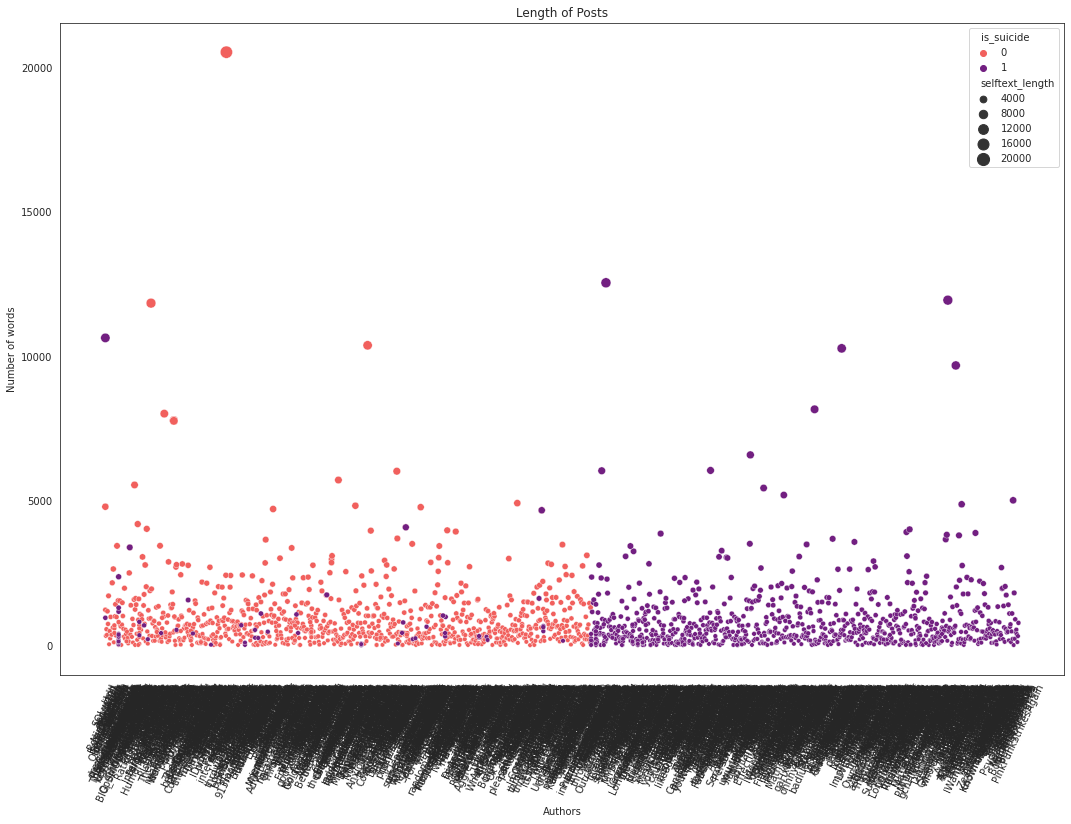

In [66]:
#CREATING A SCATTERPLOT TO VISUALISE LENGTH OF POSTS
sns.set_style("white")
plt.figure(figsize = (18, 12))
sns.scatterplot(data =combined_data,
               y = "selftext_length", 
               x = "author",
               hue = 'is_suicide', 
               palette = "magma_r",
               size = 'selftext_length',
               sizes=(20, 150));
plt.title("Length of Posts");
plt.xlabel("Authors");
plt.ylabel("Number of words");
plt.xticks(rotation=65);

#### Reviewing Length of Posts

> **Longer r/depression posts** - The average length of r/depression posts is almost 130 words shorter than that of r/SuicideWatch. Although, as we can see from our scatterplot above, this figures might be skewed by some extremely long posts and the presence of empty posts in r/SuicideWatch. 



### 2.3.6 Using Scattertext to visualise our corpus
As a final step in our EDA, we will use Scattertext to produce a user-friendly way of visualising our corpus in HTML.

In [67]:
#CREATING A megatext COLUMN
combined_data["megatext_clean"]=combined_data["author_clean"] + " " + combined_data["selftext_clean"]+ " " +combined_data["title_clean"]

In [68]:
#CREATING A DATAFRAME FOR SCATTERTEXT
scatter_data = combined_data[["megatext_clean", "is_suicide"]]
scatter_data["category"] = scatter_data["is_suicide"].map({0: "Depression", 1: "Suicide"})
scatter_data.tail()

,megatext_clean,is_suicide,category
1977,human salamander 12 wanna work live shitty life much rather lazy piece shit stay home time jealous people make money something enjoy love make money playing video game friend know happen hate people bad rich would solve lot problem yeah lazy also overwhelming anxiety stop going thing job interview today basically got job absolutely take working quit last job bad probably qualify disability check definitely mentally ill work job many thing soon end life sorry hatred towards people help ask created wanna least live comfortably safety room even life would still painful,1,Suicide
1978,lun har already plan end everything basically want spare family pain finding body problem know method use feel like go drug overdose could find strong one try pill cutting wrist want way ensures work leave destroyed corpse could help plan,1,Suicide
1979,4 lol z think writing goodbye note wa therapeutic way wrote two note,1,Suicide
1980,pink punk strike want know people would react died long would take family get cat miss could ask people know im suicidal also could lie wish could dead year see affect anybody know hard explain wish could temporarily dead see want go,1,Suicide
1981,bunny bo neigh 09 think ready go looking reason bad life go good school decent amount friend dad tell time selfish suicide live like anymore right healthy selfish keep forcing around watch suffer anything lost chance love lost chance perfect life wa stupid naive want anymore without live writing book left life thought lot going make look like accident nobody know truth know see hope know much love finally ready think,1,Suicide


In [69]:
#PARSING TEXT FOR SCATTERTEXT
nlp = st.whitespace_nlp_with_sentences
scatter_data.groupby("category").apply(lambda x: x.megatext_clean.apply(lambda x: len(x.split())).sum())
scatter_data['parsed'] = scatter_data.megatext_clean.apply(nlp)
scatter_data.tail()

,megatext_clean,is_suicide,category,parsed
1977,human salamander 12 wanna work live shitty life much rather lazy piece shit stay home time jealous people make money something enjoy love make money playing video game friend know happen hate people bad rich would solve lot problem yeah lazy also overwhelming anxiety stop going thing job interview today basically got job absolutely take working quit last job bad probably qualify disability check definitely mentally ill work job many thing soon end life sorry hatred towards people help ask created wanna least live comfortably safety room even life would still painful,1,Suicide,"(human, salamander, 12, wanna, work, live, shitty, life, much, rather, lazy, piece, shit, stay, home, time, jealous, people, make, money, something, enjoy, love, make, money, playing, video, game, friend, know, happen, hate, people, bad, rich, would, solve, lot, problem, yeah, lazy, also, overwhelming, anxiety, stop, going, thing, job, interview, today, basically, got, job, absolutely, take, working, quit, last, job, bad, probably, qualify, disability, check, definitely, mentally, ill, work, job, many, thing, soon, end, life, sorry, hatred, towards, people, help, ask, created, wanna, least, live, comfortably, safety, room, even, life, would, still, painful)"
1978,lun har already plan end everything basically want spare family pain finding body problem know method use feel like go drug overdose could find strong one try pill cutting wrist want way ensures work leave destroyed corpse could help plan,1,Suicide,"(lun, har, already, plan, end, everything, basically, want, spare, family, pain, finding, body, problem, know, method, use, feel, like, go, drug, overdose, could, find, strong, one, try, pill, cutting, wrist, want, way, ensures, work, leave, destroyed, corpse, could, help, plan)"
1979,4 lol z think writing goodbye note wa therapeutic way wrote two note,1,Suicide,"(4, lol, z, think, writing, goodbye, note, wa, therapeutic, way, wrote, two, note)"
1980,pink punk strike want know people would react died long would take family get cat miss could ask people know im suicidal also could lie wish could dead year see affect anybody know hard explain wish could temporarily dead see want go,1,Suicide,"(pink, punk, strike, want, know, people, would, react, died, long, would, take, family, get, cat, miss, could, ask, people, know, im, suicidal, also, could, lie, wish, could, dead, year, see, affect, anybody, know, hard, explain, wish, could, temporarily, dead, see, want, go)"
1981,bunny bo neigh 09 think ready go looking reason bad life go good school decent amount friend dad tell time selfish suicide live like anymore right healthy selfish keep forcing around watch suffer anything lost chance love lost chance perfect life wa stupid naive want anymore without live writing book left life thought lot going make look like accident nobody know truth know see hope know much love finally ready think,1,Suicide,"(bunny, bo, neigh, 09, think, ready, go, looking, reason, bad, life, go, good, school, decent, amount, friend, dad, tell, time, selfish, suicide, live, like, anymore, right, healthy, selfish, keep, forcing, around, watch, suffer, anything, lost, chance, love, lost, chance, perfect, life, wa, stupid, naive, want, anymore, without, live, writing, book, left, life, thought, lot, going, make, look, like, accident, nobody, know, truth, know, see, hope, know, much, love, finally, ready, think)"


In [70]:
#DEFINING A CORPUS FOR SCATTERTEXT VISUALISATION
corpus = st.CorpusFromParsedDocuments(scatter_data, category_col="category", parsed_col="parsed").build()

In [71]:
#CREATING A SCATTERTEXT PLOT
html = produce_scattertext_explorer(corpus,
                                    category='Depression',
                                    category_name='Depression',
                                    not_category_name='Suicide',
                                    width_in_pixels=1000,
                                    jitter=0.1,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=scatter_data['category']
                                   )
file_name = '/content/drive/My Drive/ML mini project(Group-9)/assets/Reddit_ScattertextRankDataJitter.html'
##open(file_name, 'wb').write(html.encode('utf-8'))
#IFrame(src=file_name, width = 1200, height=700)
display(HTML(html))

Output hidden; open in https://colab.research.google.com to view.

In [72]:
#CHECKING IF OUR NEWER COLUMNS INTRODUCED MISSING DATA INTO OUR DATASET
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1982 non-null   object
 1   selftext         1982 non-null   object
 2   author           1982 non-null   object
 3   num_comments     1982 non-null   int64 
 4   is_suicide       1982 non-null   int64 
 5   url              1982 non-null   object
 6   selftext_clean   1982 non-null   object
 7   title_clean      1982 non-null   object
 8   author_clean     1982 non-null   object
 9   selftext_length  1982 non-null   int64 
 10  title_length     1982 non-null   int64 
 11  megatext_clean   1982 non-null   object
dtypes: int64(4), object(8)
memory usage: 185.9+ KB


#### NOTE: I've commented out the code in the next cell for "pd.to_csv" to prevent any accidental overwriting of the the saved dataset.**

In [ ]:
#SAVING combined_data
combined_data.to_csv('/content/drive/My Drive/ML mini project/data_for_model.csv', index = False)